Project 2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
file_path = r"C:\Users\debja\OneDrive\Desktop\DA Python Pandas Projects\Main Flow Internship tasks\Task 2\Project 2\Ecommerce_Sales.csv"
data = pd.read_csv(file_path, encoding="latin1")

In [11]:
# Display basic information about the dataset
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Year           9994 non-null   int64  
 3   Order Date     9994 non-null   object 
 4   Ship Date      9994 non-null   object 
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9994 non-null   int64  
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

In [13]:
# Show the first few rows of the dataset to get an overview
data_head = data.head()

In [15]:
# Check for missing values and duplicate rows
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

In [17]:
data_info, data_head, missing_values, duplicates

(None,
    Row ID        Order ID  Year  Order Date   Ship Date       Ship Mode  \
 0       1  CA-2013-152156  2013   11/9/2013  11/12/2013    Second Class   
 1       2  CA-2013-152156  2013   11/9/2013  11/12/2013    Second Class   
 2       3  CA-2013-138688  2013   6/13/2013   6/17/2013    Second Class   
 3       4  US-2012-108966  2012  10/11/2012  10/18/2012  Standard Class   
 4       5  US-2012-108966  2012  10/11/2012  10/18/2012  Standard Class   
 
   Customer ID    Customer Name    Segment        Country  ... Postal Code  \
 0    CG-12520      Claire Gute   Consumer  United States  ...       42420   
 1    CG-12520      Claire Gute   Consumer  United States  ...       42420   
 2    DV-13045  Darrin Van Huff  Corporate  United States  ...       90036   
 3    SO-20335   Sean O'Donnell   Consumer  United States  ...       33311   
 4    SO-20335   Sean O'Donnell   Consumer  United States  ...       33311   
 
   Region       Product ID         Category Sub-Category  \
 0  S

In [19]:
# Convert the 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [21]:
# Sort data by Order Date to ensure proper time series plotting
data = data.sort_values(by='Order Date')

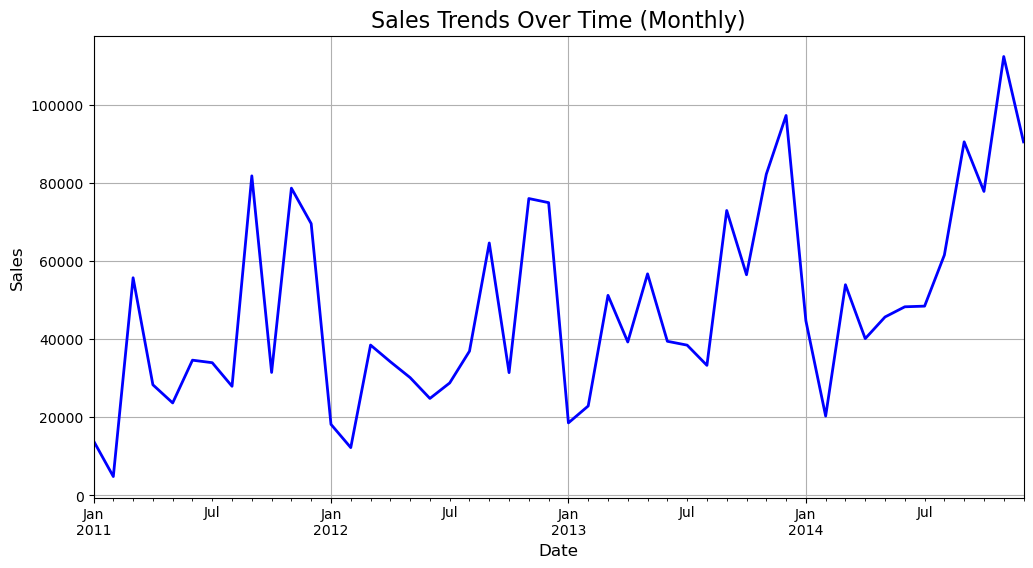

In [25]:
# Time series plot of sales over time
plt.figure(figsize=(12, 6))
data.set_index('Order Date')['Sales'].resample('ME').sum().plot(color='blue', linewidth=2)
plt.title('Sales Trends Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.show()

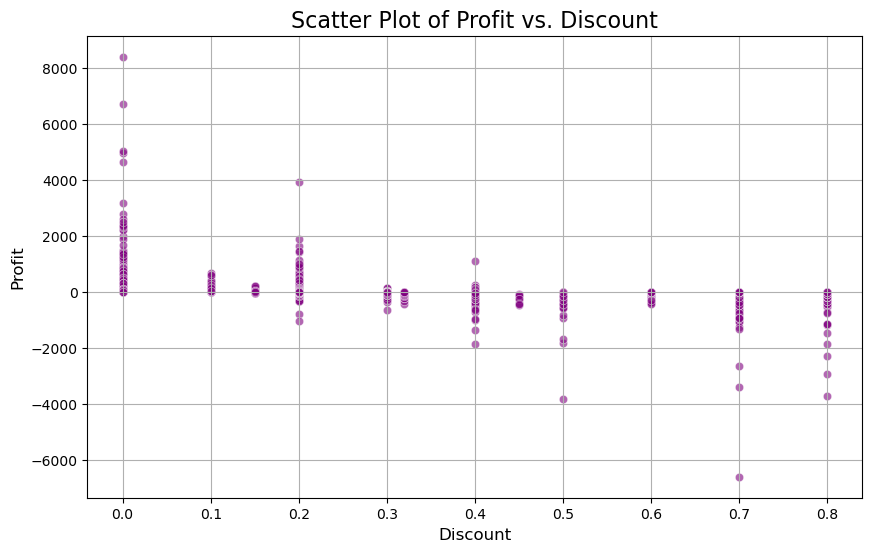

In [27]:
# Scatter plot: Profit vs. Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=data, alpha=0.6, color='purple')
plt.title('Scatter Plot of Profit vs. Discount', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(True)
plt.show()

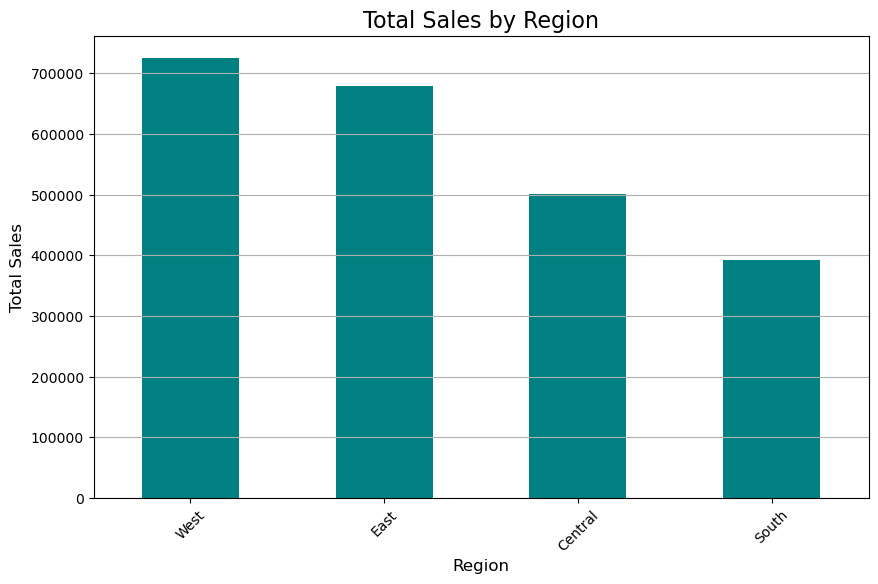

In [29]:
# Bar plot: Sales by Region
plt.figure(figsize=(10, 6))
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

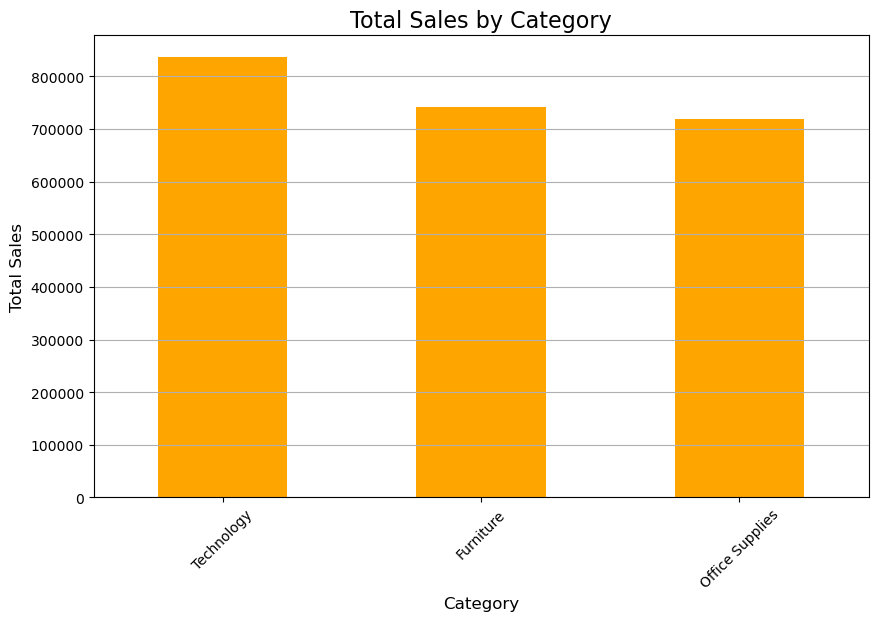

In [31]:
# Bar plot: Sales by Category
plt.figure(figsize=(10, 6))
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = data[['Profit', 'Discount']]
y = data['Sales']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(481448.9823208096, 0.004897483833575467)

The Linear Regression model's performance metrics are as follows:

1) Mean Squared Error (MSE): 481,448, indicating a high error in the predictions.
2) R² Score: 0.0049, suggesting that the model does not explain much variance in the sales data.
    
This indicates that "Profit" and "Discount" alone are not strong predictors of sales. 
Additional features like "Category," "Region," or customer-related factors may improve the model's performance.